# EDA portion of linear regression project

In [109]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
df=pd.read_csv(r"C:\Users\DIWAKAR YADAV\Downloads\cleaned_dataset.csv")
df.head()

,brand,price,reting,is_5g,is_nfc,is_ir_blaster,processor_brand,core,proccessor_speed,ram,internal_memory,battery_size,fast_charge,charging_speed,rear_mp,front_mp,os,display_size,refresh_rate
0,Samsung,74999,92.0,1,1.0,0,Snapdragon,8,3.30,12.0,256,5000,1,45,200,12,Android,6.80,120
1,Oneplus,24997,83.0,1,0.0,1,Dimensity,8,3.35,8.0,128,7100,1,80,50,16,Android,6.77,120
2,Apple,47999,81.0,1,1.0,0,Bionic,6,3.46,6.0,128,3349,1,20,48,12,iOS,6.10,60
3,Realme,16999,82.0,1,0.0,0,Dimensity,8,2.40,6.0,128,7000,1,60,50,50,Android,6.81,144
4,Samsung,33890,84.0,1,1.0,0,Exynos,10,3.11,8.0,128,4700,1,25,50,10,Android,6.70,120


#### #Display all column names of the DataFrame

In [111]:
df.columns

Index(['brand', 'price', 'reting', 'is_5g', 'is_nfc', 'is_ir_blaster',
       'processor_brand', 'core', 'proccessor_speed', 'ram', 'internal_memory',
       'battery_size', 'fast_charge', 'charging_speed', 'rear_mp', 'front_mp',
       'os', 'display_size', 'refresh_rate'],
      dtype='object')

#### #**Check shape of the DataFrame**

In [112]:
df.shape

(911, 19)

##### Checking Dataset Shape
Before analyzing the data, it's important to know the size of the dataset:
- **Rows** → represent the number of records
- **Columns** → represent the number of features


#### #**Geting information about dataset**

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             911 non-null    object 
 1   price             911 non-null    int64  
 2   reting            911 non-null    float64
 3   is_5g             911 non-null    int64  
 4   is_nfc            911 non-null    float64
 5   is_ir_blaster     911 non-null    int64  
 6   processor_brand   911 non-null    object 
 7   core              911 non-null    int64  
 8   proccessor_speed  911 non-null    float64
 9   ram               911 non-null    float64
 10  internal_memory   911 non-null    int64  
 11  battery_size      911 non-null    int64  
 12  fast_charge       911 non-null    int64  
 13  charging_speed    911 non-null    int64  
 14  rear_mp           911 non-null    int64  
 15  front_mp          911 non-null    int64  
 16  os                911 non-null    object 
 1

##### Dataset Information

`df.info()` provides:
- **Column names**
- **Number of non-null entries** (helps detect missing data)
- **Data types** (int, float, object, etc.)
- **Memory usage**  

This step helps us understand the structure of the dataset and identify potential issues before analysis.


#### #**Display all categorical columns of dataframe**

In [114]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print(categorical_cols)

Index(['brand', 'processor_brand', 'os'], dtype='object')


##### Identifying Categorical Columns

Categorical columns are **non-numeric columns** that represent categories or labels.
Identifying them is important for:
- Encoding data for machine learning
- Grouping or aggregating data
- Data visualization


#### #**Display all numerical columns of dataframe**

In [115]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_cols)

Index(['price', 'reting', 'is_5g', 'is_nfc', 'is_ir_blaster', 'core',
       'proccessor_speed', 'ram', 'internal_memory', 'battery_size',
       'fast_charge', 'charging_speed', 'rear_mp', 'front_mp', 'display_size',
       'refresh_rate'],
      dtype='object')


##### Identifying Numerical Columns

Numerical columns are **columns with numeric data** like integers or floats.  
They are used for:
- Calculations and aggregations
- Statistical analysis
- Data visualization (like histograms, scatter plots)


#### #**Plot each numerical column against 'price'**

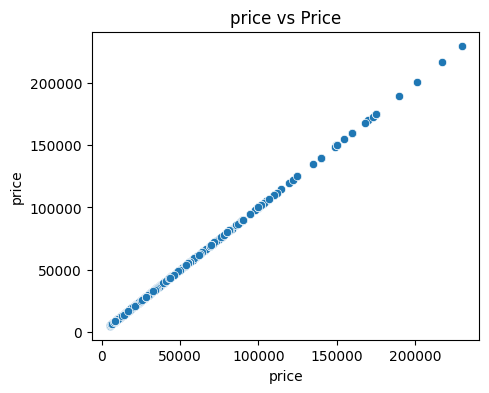

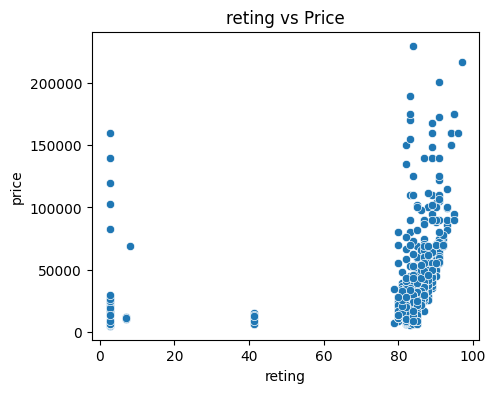

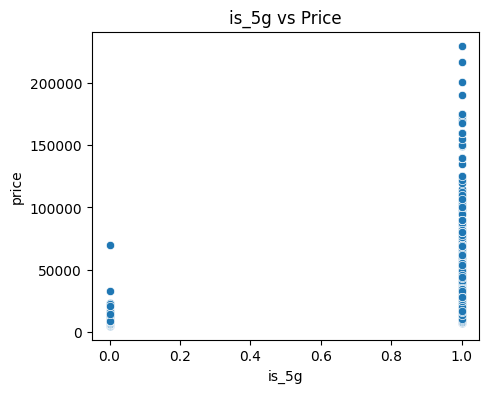

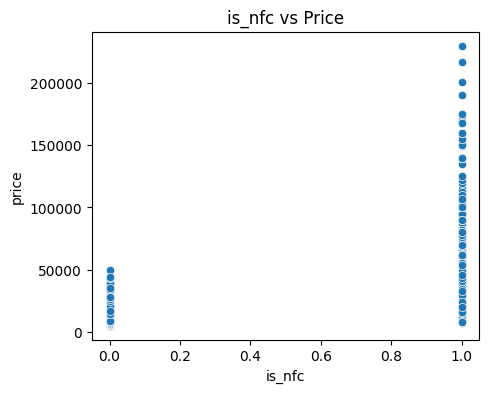

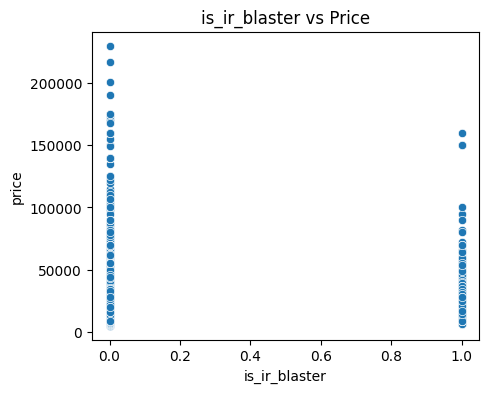

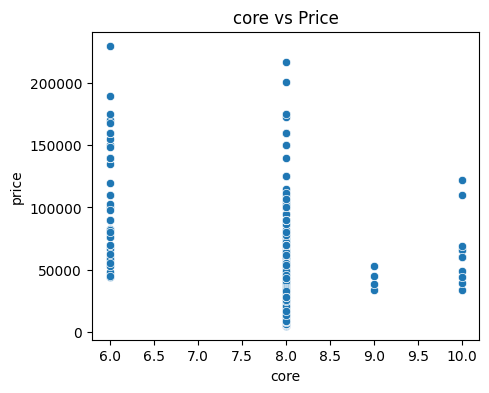

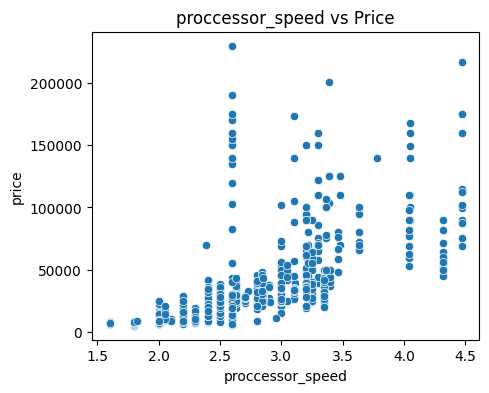

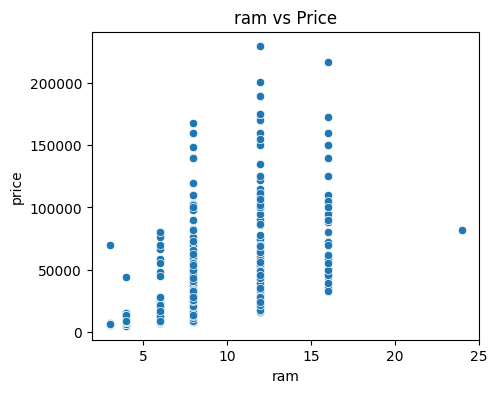

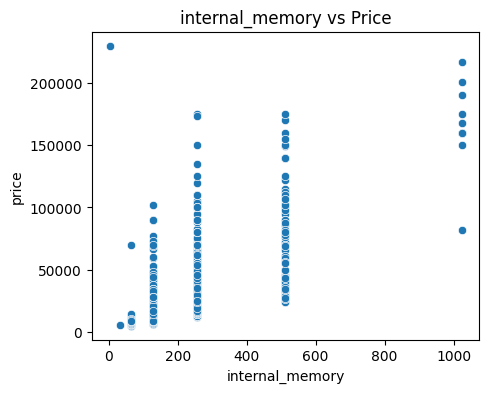

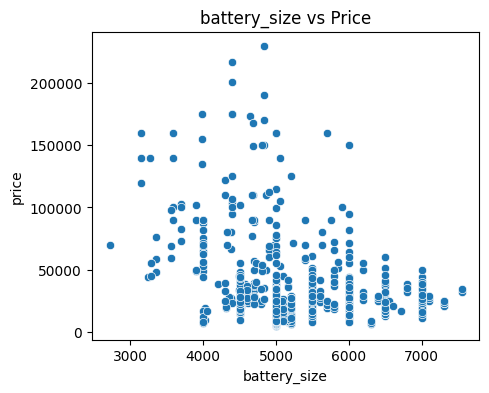

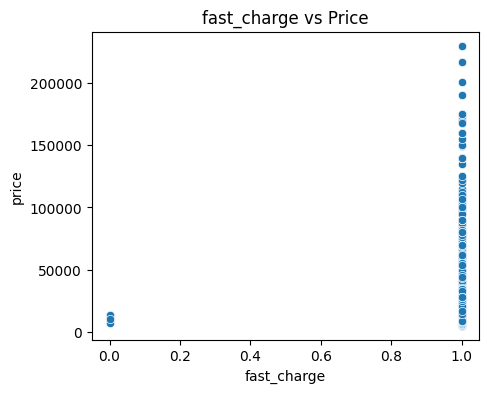

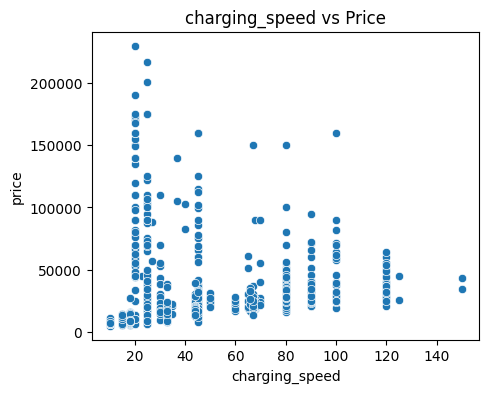

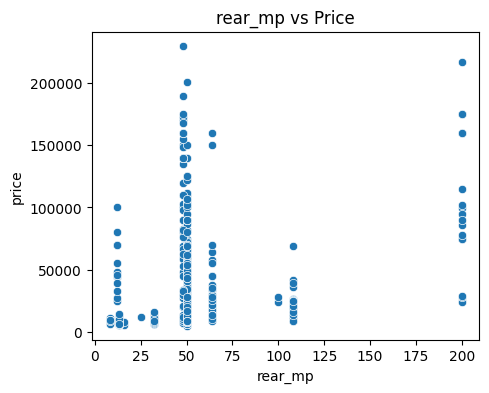

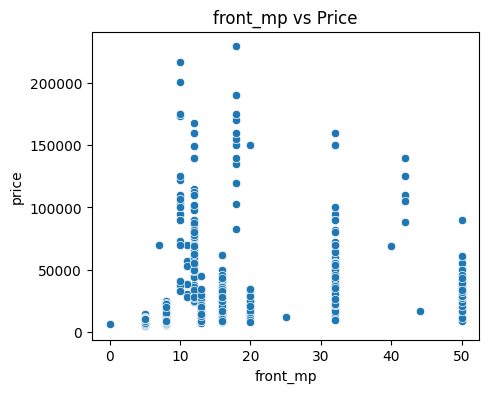

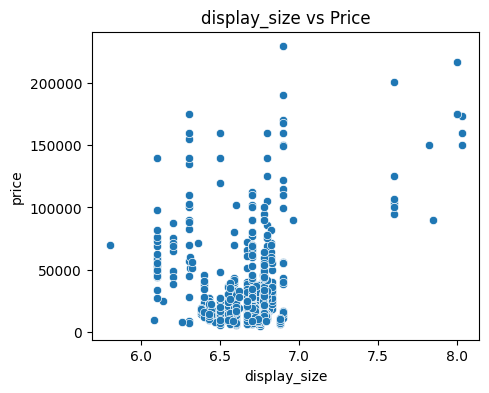

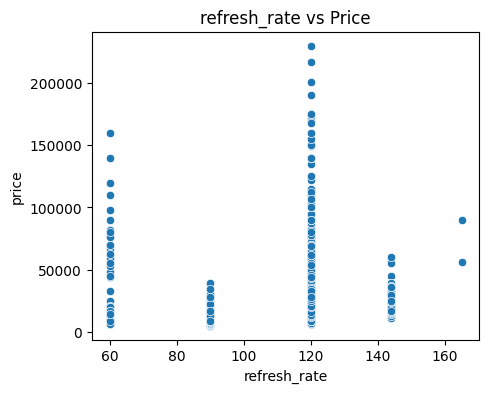

In [116]:
for col in numerical_cols:
    plt.figure(figsize=(5,4))
    sns.scatterplot(x=df[col], y=df['price'])
    plt.title(f'{col} vs Price')
    plt.show()

##### Scatter Plots: Numerical Features vs Price

Scatter plots help us **understand the relationship between numerical features and the target variable (`price`)**.  
We can identify:
- Positive or negative correlations
- Outliers
- Potential patterns for modeling


#### #**Histogram and boxplot on numericals columns**

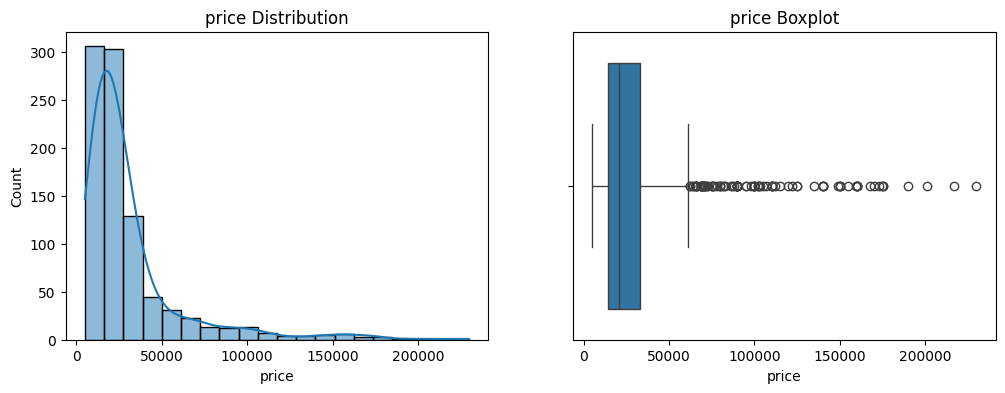

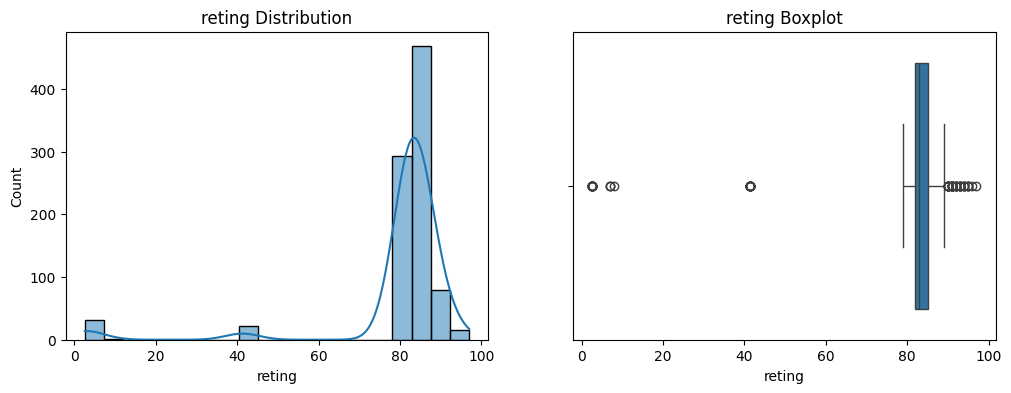

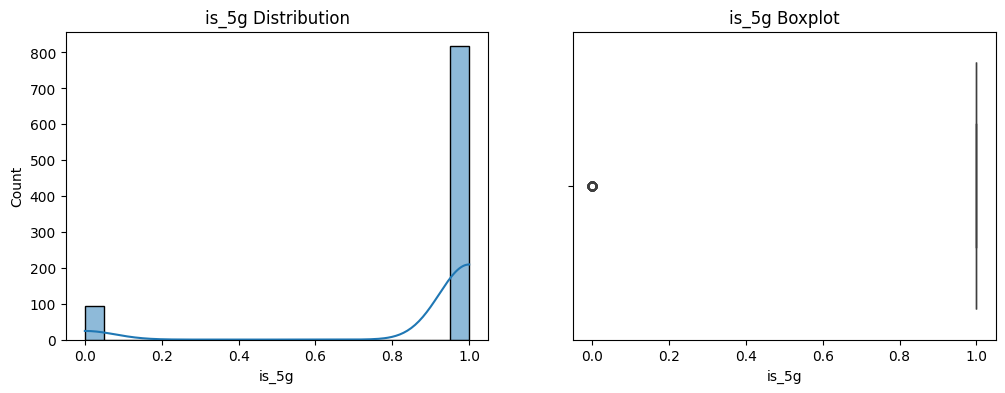

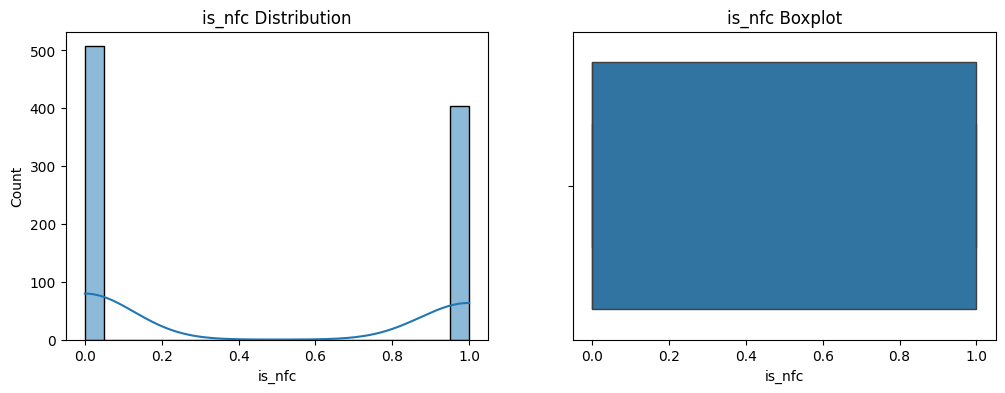

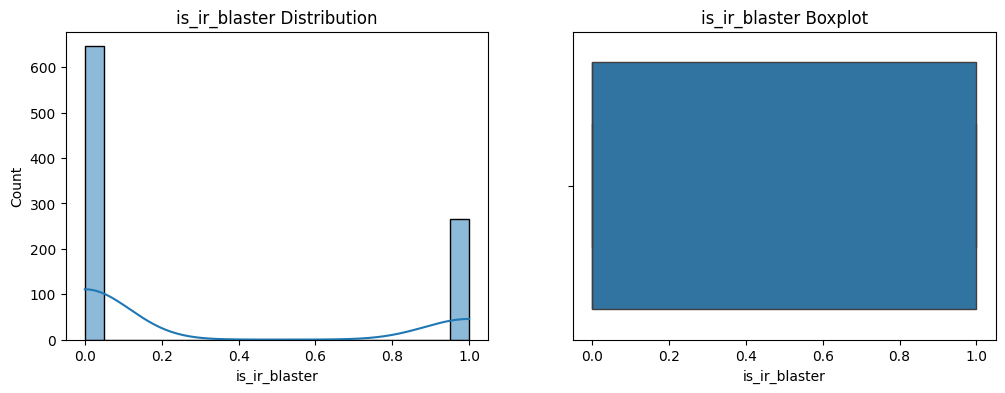

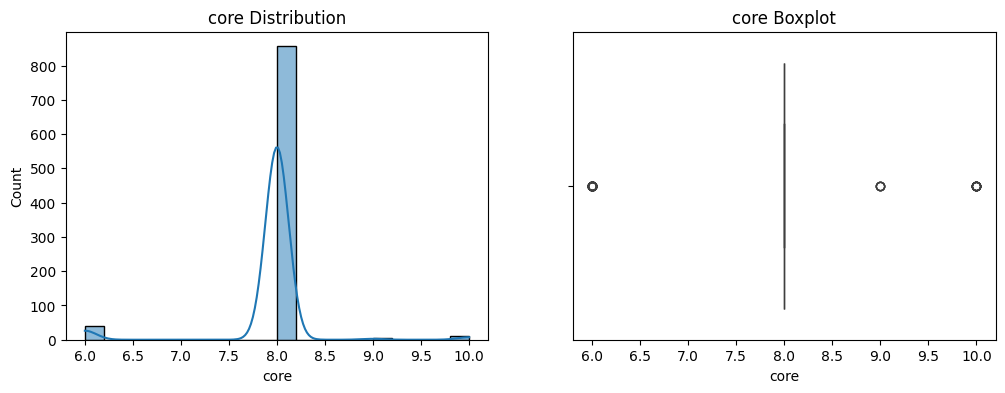

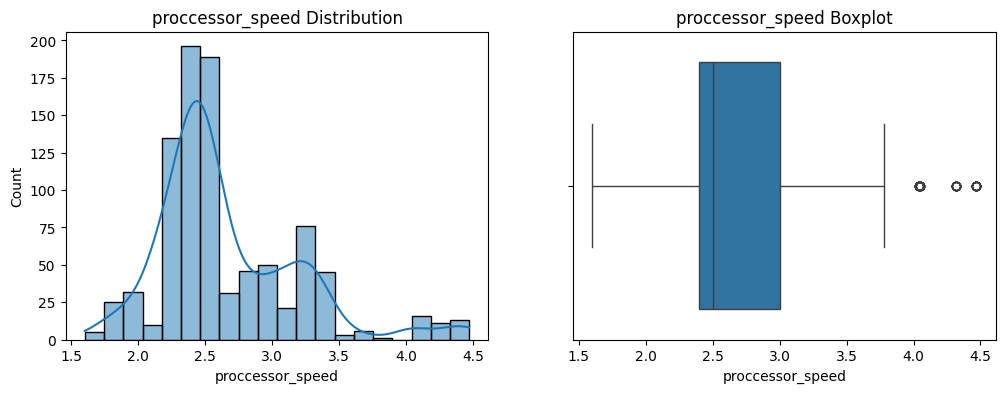

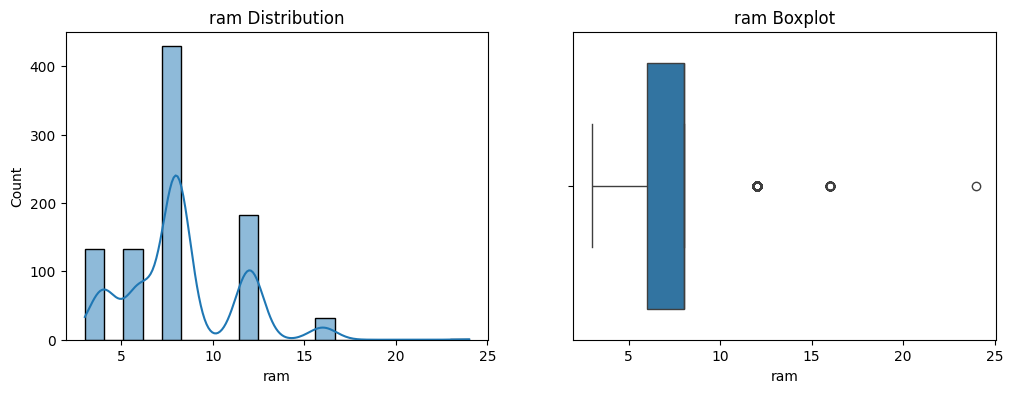

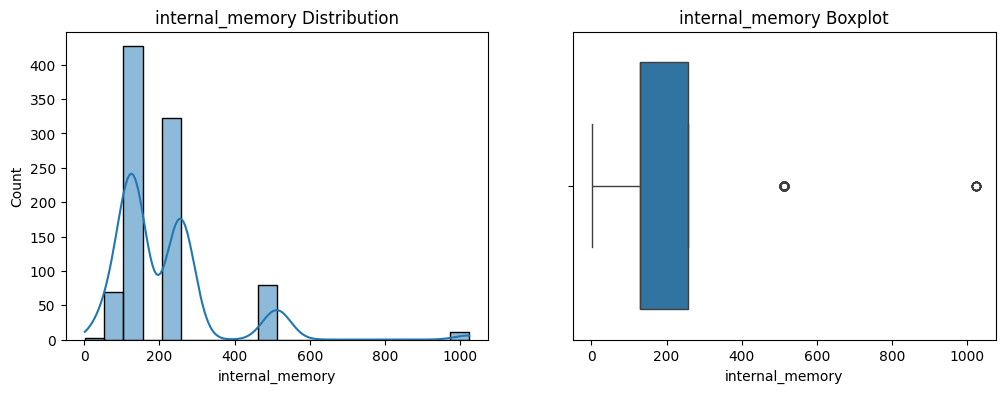

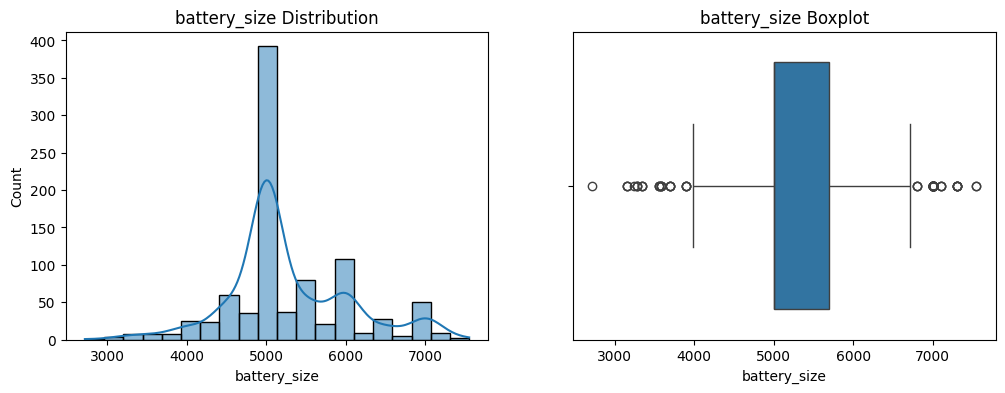

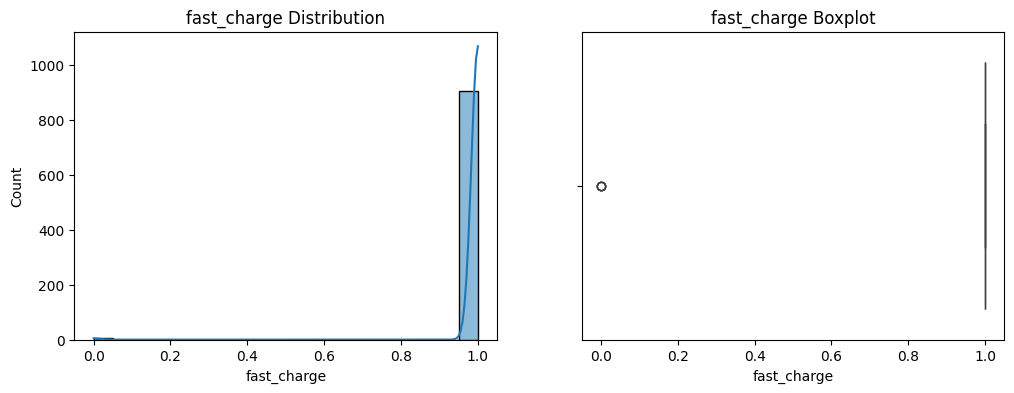

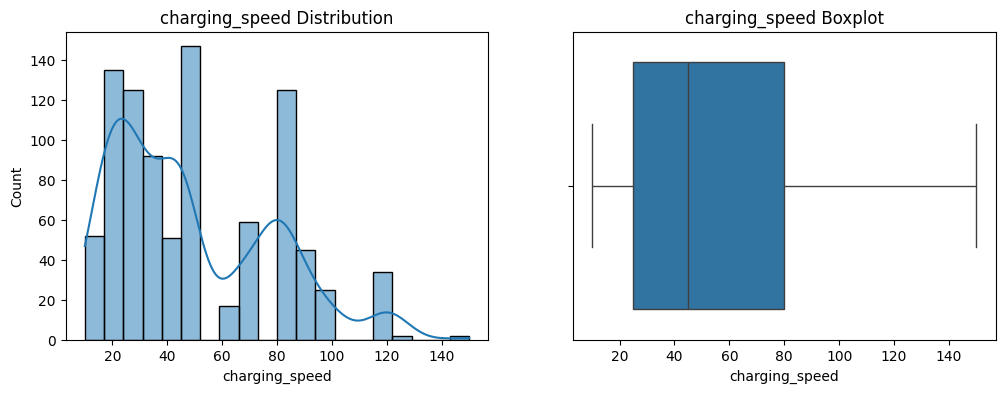

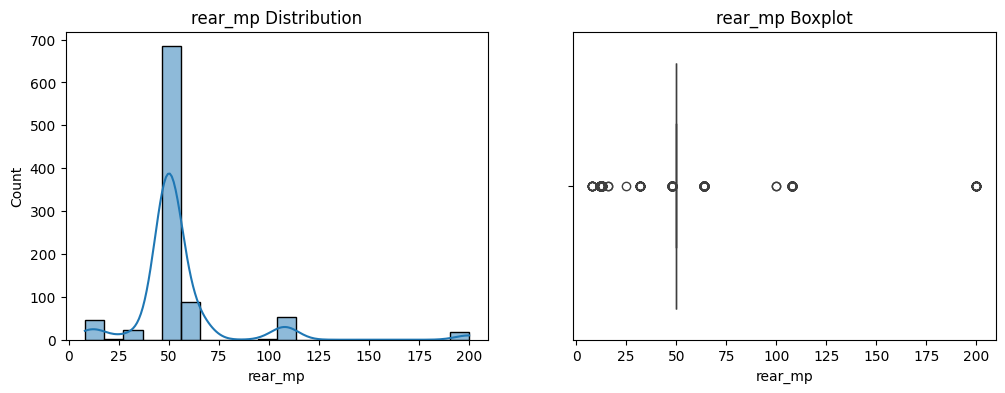

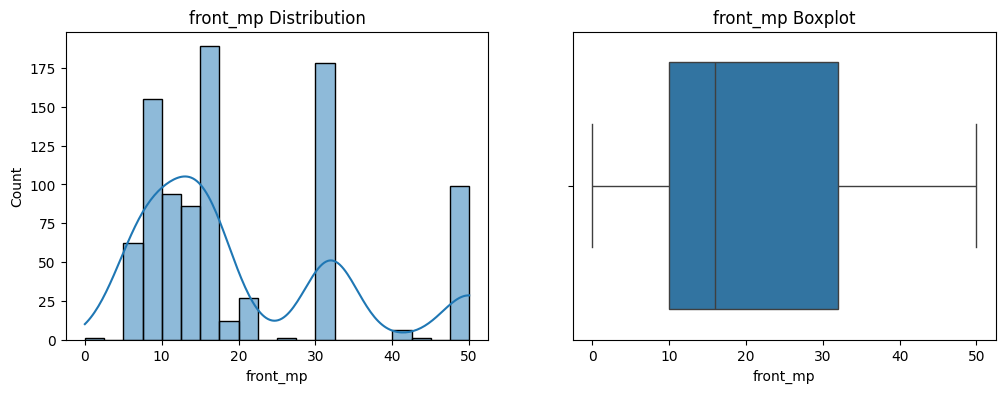

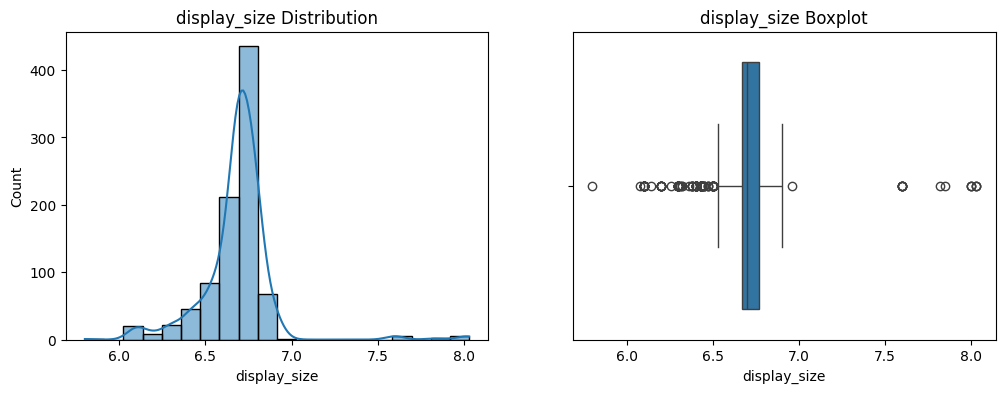

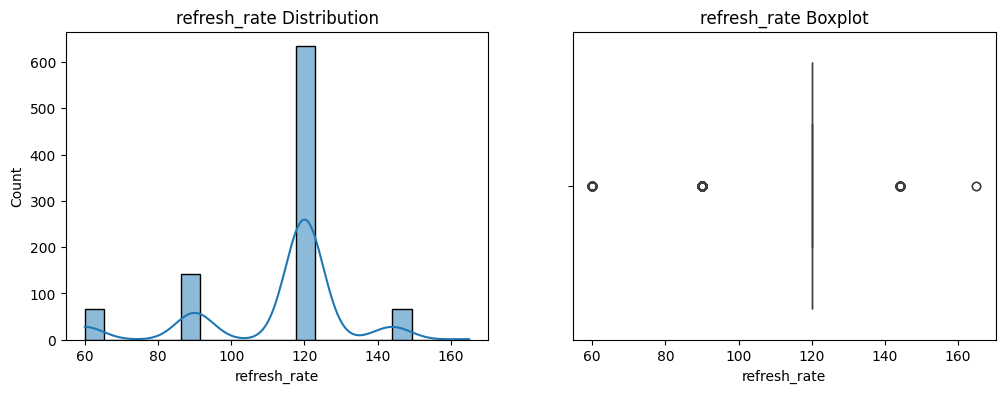

In [117]:
for col in numerical_cols:
    plt.figure(figsize=(12,4))
    
    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'{col} Distribution')
    
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f'{col} Boxplot')
    
    plt.show()

##### Distribution & Outlier Analysis (Numerical Features)

In this step, we analyze the **distribution and spread of numerical columns** using:
- **Histogram** → to understand the data distribution and skewness  
- **Boxplot** → to detect outliers and observe data spread  

This helps identify:
- Skewed features
- Extreme values (outliers)
- Whether transformations or scaling may be needed

#### Observations
- Histograms show whether the data is **normally distributed or skewed**.
- Boxplots highlight **outliers** that may need treatment.
- Features with heavy skewness or many outliers may require:
  - Log transformation
  - Outlier removal or capping
  - Feature scaling

#### #**Calculate correlation of numerical features with price**

In [118]:
num_corr = (
    df[numerical_cols]
    .corr()
    ['price']
    .sort_values(ascending=False)
)

print(num_corr)

price               1.000000
internal_memory     0.680224
proccessor_speed    0.659223
ram                 0.538021
is_nfc              0.486375
display_size        0.237773
is_5g               0.225594
rear_mp             0.221599
reting              0.131527
front_mp            0.121951
refresh_rate        0.092819
charging_speed      0.071695
fast_charge         0.042631
is_ir_blaster      -0.040364
battery_size       -0.268302
core               -0.390155
Name: price, dtype: float64


##### Correlation of Numerical Features with Price

Correlation measures the **strength and direction of the relationship** between numerical variables and the target variable (`price`).

- Values close to **+1** → strong positive relationship  
- Values close to **-1** → strong negative relationship  
- Values close to **0** → weak or no relationship  

This helps us identify **important features** that may have a strong impact on price.

#### Interpretation
- Features at the top have a **strong positive correlation** with price.
- Features at the bottom have a **negative correlation** with price.
- Features with correlation near **0** have little influence on price.


#### #**Plot correlation heatmap for numerical features**

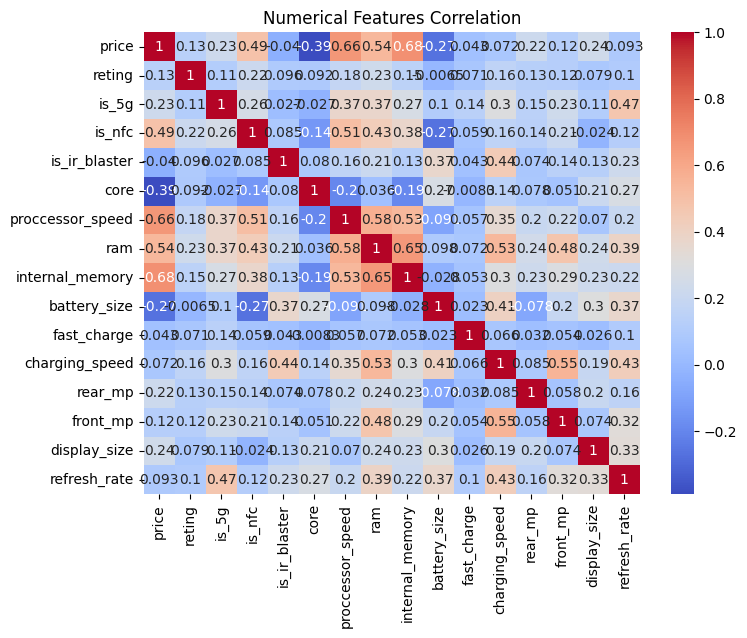

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(
    df[numerical_cols].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Numerical Features Correlation")
plt.show()

##### Correlation Heatmap (Numerical Features)

A correlation heatmap visually represents the **pairwise correlation** between numerical features.  
It helps us:
- Identify **strong relationships** between variables
- Detect **multicollinearity** (high correlation between features)
- Understand how features interact with each other

##### Interpretation
- **Red colors** indicate strong positive correlation.
- **Blue colors** indicate strong negative correlation.
- Values close to **0** suggest weak or no correlation.
- Highly correlated features may cause **multicollinearity** and can be removed or combined.



#### #**Frequency Analysis of Categorical Variables**

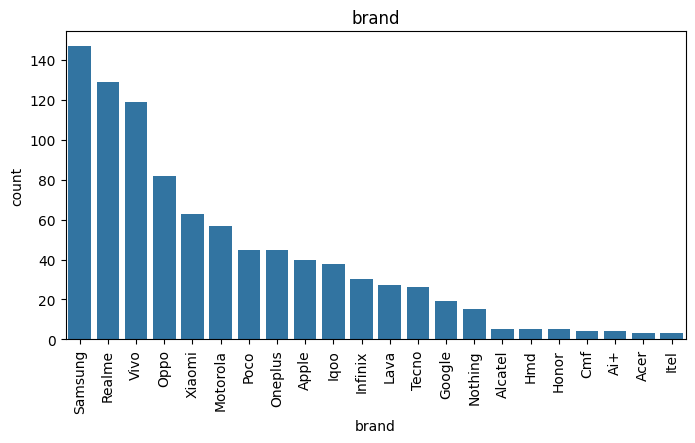

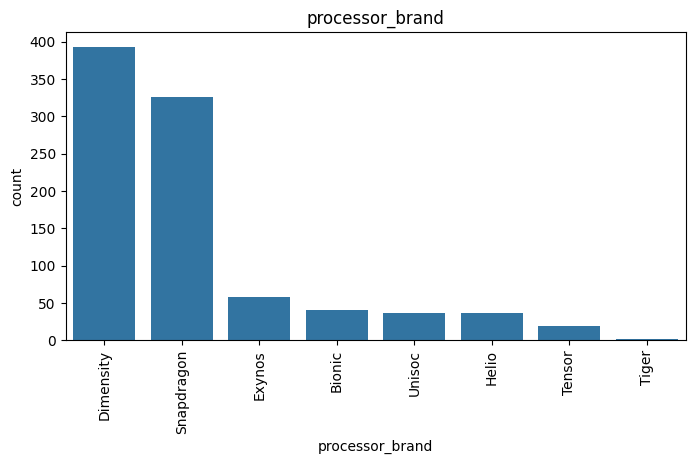

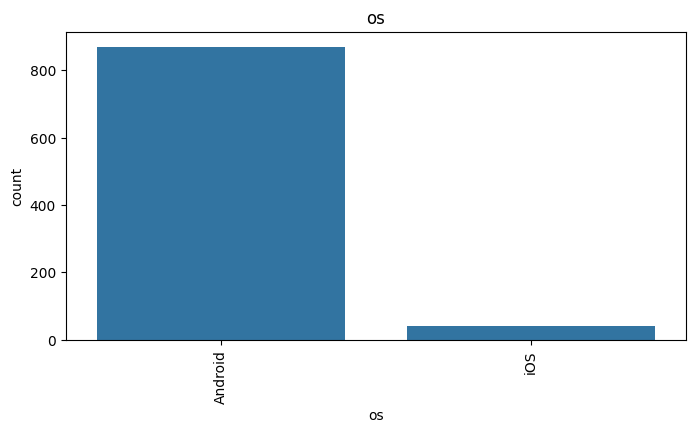

In [120]:
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'{col}')
    plt.xticks(rotation=90)
    plt.show()

##### Distribution of Categorical Features

Count plots are used to visualize the **frequency of each category** in categorical columns.  
This helps us:
- Understand category distribution
- Identify **dominant categories**
- Detect **class imbalance**

##### Interpretation
- Taller bars indicate **more frequent categories**.
- Categories with very few samples may need:
  - Grouping into an “Other” category
  - Careful handling during modeling
- Highly imbalanced categories can affect model performance.


#### #**boxplot to compare price distribution across eac categorical col**

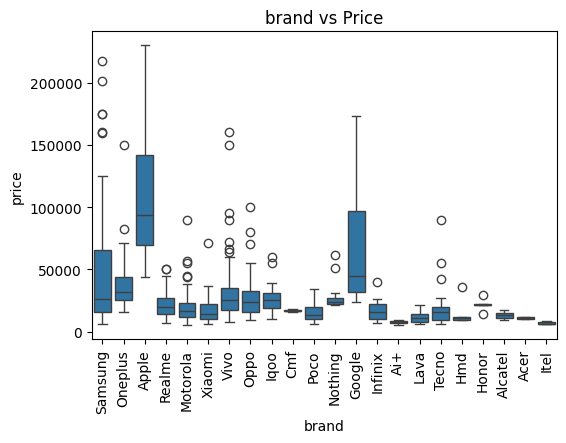

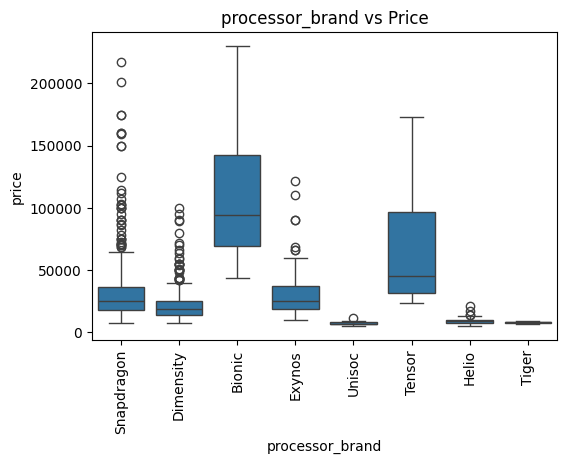

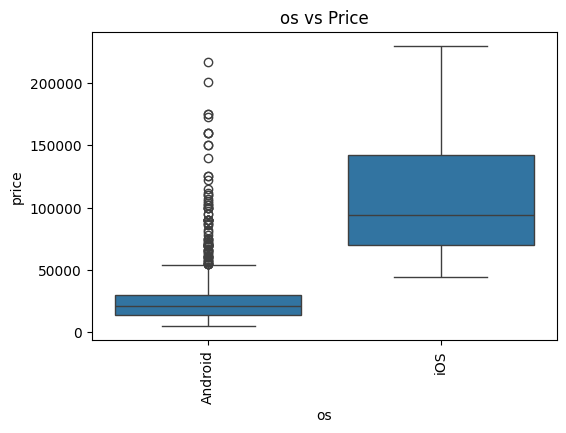

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], y=df['price'])
    plt.title(f'{col} vs Price')
    plt.xticks(rotation=90)
    plt.show()

##### Categorical Features vs Price Analysis

Boxplots are used to analyze how the **distribution of the target variable (`price`) changes across different categories**.

This visualization helps us:
- Compare **price variation** among categories
- Identify **categories with higher or lower median prices**
- Detect **outliers** within each category
- Understand the influence of categorical features on price

##### Interpretation
- The median line inside each box represents the **typical price** for that category.
- Categories with higher medians may have a **strong positive impact** on price.
- Wide boxes indicate **high price variability**.
- Extreme points represent **outliers** that may require attention.


#### #**Visualize the distribution of brands using a bar chart**

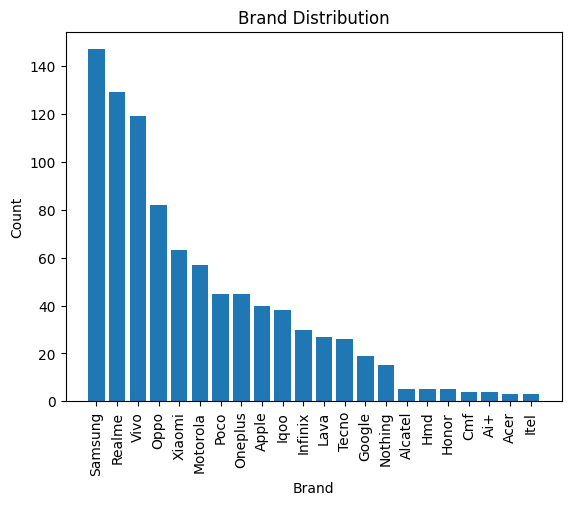

In [122]:
plt.bar(df['brand'].value_counts().index,df['brand'].value_counts().values)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Brand Distribution')

plt.xticks(rotation=90)

plt.show()

##### Brand Distribution Analysis

This bar chart visualizes the **frequency of each brand** in the dataset.  
It helps us:
- Identify **most common and least common brands**
- Understand **brand dominance** in the dataset

##### Interpretation
- Taller bars represent **brands with more products**.
- Brands with very low counts may have **limited influence** during modeling.
- Highly frequent brands may dominate predictions and should be handled carefully.

#### Brand Distribution (Summary)
The plot shows that Samsung dominates the dataset, followed by Realme and Vivo. Several brands have moderate representation, while many brands appear very rarely, indicating class imbalance across brands. This imbalance may influence model predictions and should be considered during feature engineering.

#### #**Visualize the distribution of the target variable (price)**

<Axes: xlabel='price', ylabel='Count'>

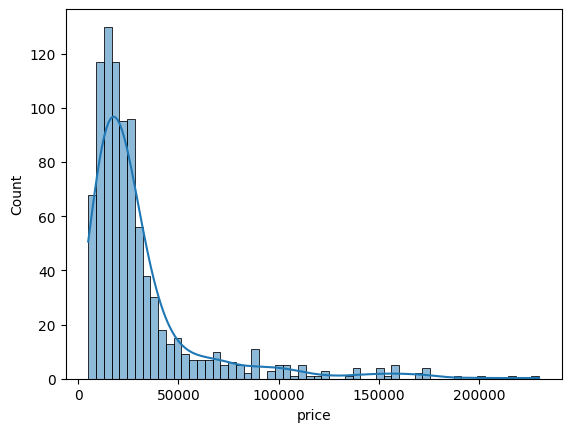

In [123]:
sns.histplot(df['price'],kde=True)

##### Target Variable Analysis: Price Distribution

The `price` column is the **target variable** in this dataset.  
Analyzing its distribution is essential before model building.

This visualization helps us:
- Understand how the **target values are distributed**
- Identify **skewness** in the target variable
- Detect **outliers or extreme price values**
- Decide whether transformations (e.g., log transformation) are required

##### Conclusions
The distribution of the price column is right-skewed, with most values concentrated in the lower price range and a long tail toward higher prices. This indicates the presence of outliers

So we use log transform

#### #**Visualize the log-transformed distribution of the target variable (price)**

<Axes: xlabel='price', ylabel='Count'>

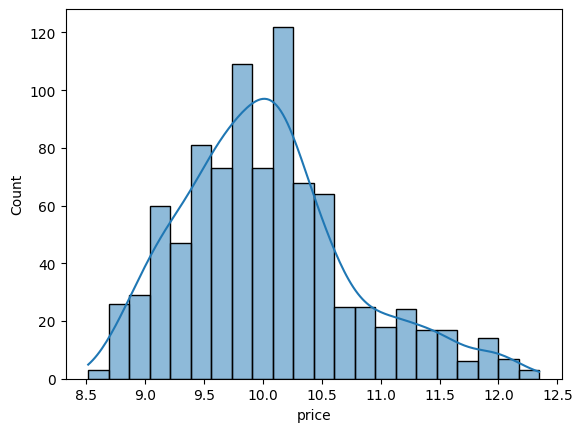

In [124]:
sns.histplot(np.log1p(df['price']),kde=True)

##### Log Transformation of Target Variable (Price)

Since `price` is the **target variable** and may be **right-skewed**, a log transformation is applied to reduce skewness and stabilize variance.

We use `log1p()` instead of `log()` because:
- It safely handles **zero values**
- It improves **model learning and performance**

##### Interpretation
- The log-transformed distribution is more **symmetric and closer to normal**.
- Reduced skewness helps many machine learning models perform better.
- Extreme price values have **less influence** after transformation.

##### Conclusion
after log transform the data is nearly normalize

#### #**Boxplot of target variable before log tranfrom**

<Axes: xlabel='price'>

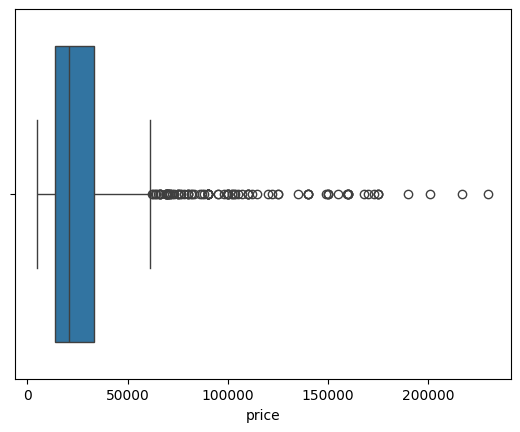

In [125]:
sns.boxplot(x=df['price'])

##### Boxplot of Target Variable (Price)

This boxplot visualizes the **distribution and outliers** of the original target variable (`price`) **before any transformation**.

It helps us:
- Identify **extreme price values (outliers)**
- Understand the **spread and variability** of prices
- Compare the effect of transformations (like log scaling) later


#### #**Boxplot of target variable after log transform**

<Axes: xlabel='price'>

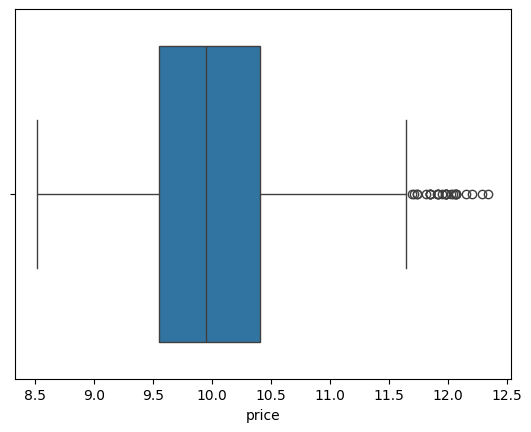

In [126]:
sns.boxplot(x=np.log1p(df['price']))

##### Boxplot of Log-Transformed Target Variable (Price)

This boxplot visualizes the **spread and outliers** of the **log-transformed target variable (`price`)**.

It helps us:
- Identify **remaining outliers** after log transformation
- Understand the **range and variability** of transformed price values
- Verify whether the log transformation has effectively reduced skewness

##### Interpretation
- Fewer extreme points indicate successful **outlier reduction**.
- A compact box suggests improved **data stability**.
- Remaining outliers may still need special handling depending on the model.

##### Conclusion
finally it show after transforming target variable to log transform outlies are reduce  

#### #**Analyze how log-transformed price varies across categorical features**

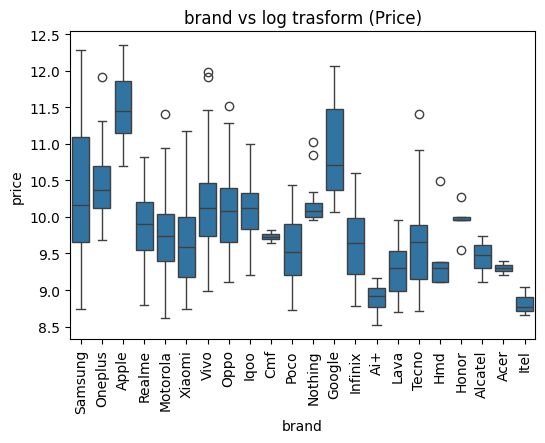

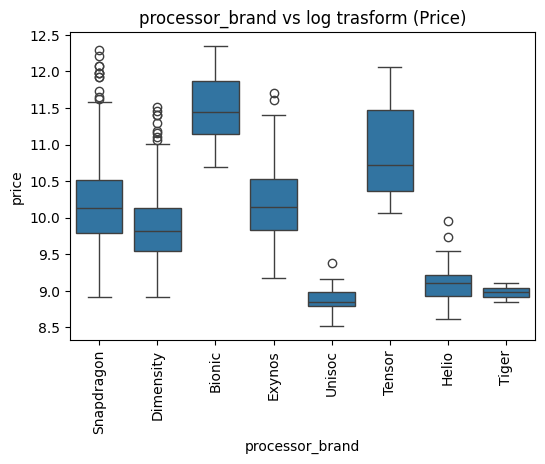

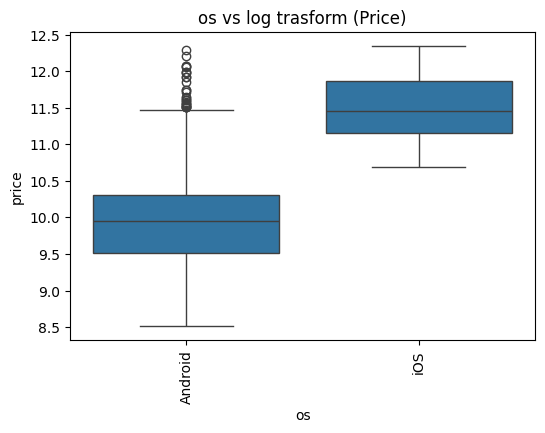

In [127]:
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], y=np.log1p(df['price']))
    plt.title(f'{col} vs log trasform (Price)')
    plt.xticks(rotation=90)
    plt.show()

##### Categorical Features vs Log-Transformed Price

This analysis visualizes how the **log-transformed target variable (`price`)** varies across different **categorical features**.

Using the log-transformed price helps:
- Reduce skewness in price values
- Minimize the influence of extreme prices
- Make category-wise comparisons more reliable


##### Conclusion 
majority of outliers are reduce after log trandform of target variable<br>
we cannot remove the outliers forcefully because many mobile phones are costly

#### #**Reting column**

In [128]:
df['reting'].value_counts()

reting
84.00    153
82.00    148
83.00    128
85.00    105
80.00     67
81.00     66
86.00     38
87.00     38
2.60      29
89.00     24
41.30     22
88.00     19
91.00     17
90.00     14
81.50     10
85.02      6
93.00      6
92.00      5
95.00      4
94.00      4
7.00       3
78.85      2
8.00       1
97.00      1
96.00      1
Name: count, dtype: int64

##### Rating Frequency Analysis

This step examines the **frequency distribution of the `rating` feature** to understand how ratings are spread across the dataset.

It helps us:
- Identify the **most common rating values**
- Detect **imbalanced ratings**
- Understand user or product rating patterns


In [129]:
df['reting'].describe()

count    911.000000
mean      80.016268
std       16.532397
min        2.600000
25%       82.000000
50%       83.000000
75%       85.000000
max       97.000000
Name: reting, dtype: float64

##### Statistical Summary of Rating Feature

This step provides a **statistical overview of the `rating` feature**, including central tendency and spread.

It helps us:
- Understand the **range of ratings**
- Analyze the **average (mean) rating**
- Identify **variability** in ratings
- Detect potential **outliers or unusual values**


<Axes: xlabel='reting'>

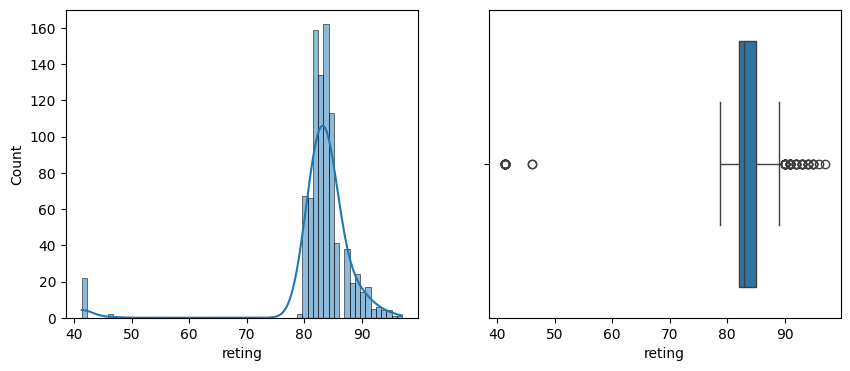

In [159]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df['reting'],kde=True,ax=axes[0])
sns.boxplot(x = df['reting'],ax=axes[1])

##### the histlot of reting column
-> it give information about the distribution od reting column<br>
-> its distribution is skewed

##### the boxplot of reting column
This cell calculates the first quartile (Q1), third quartile (Q3), Interquartile Range (IQR), and the lower and upper bounds for outlier detection in the 'reting' column.

In [131]:
Q1 = df['reting'].quantile(0.25)
Q3 = df['reting'].quantile(0.75)
IQR = Q3 - Q1
print("Q1 :",Q1)
print("Q3 :",Q3)
print("IQR :",IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower bound :",lower_bound)
print("Upper bound :",upper_bound)

Q1 : 82.0
Q3 : 85.0
IQR : 3.0
Lower bound : 77.5
Upper bound : 89.5


##### Outlier Detection Using IQR (Rating Feature)

This step uses the **Interquartile Range (IQR) method** to detect potential **outliers** in the `rating` feature.

The IQR method is robust because it focuses on the **middle 50% of the data** and is less affected by extreme values.

##### Rating Distribution (Summary)
Most ratings lie between 75 and 90, with a few low-value outliers below 10, indicating possible anomalies that may need cleaning before modeling.

In [132]:
df[df['reting']<10]

,brand,price,reting,is_5g,is_nfc,is_ir_blaster,processor_brand,core,proccessor_speed,ram,internal_memory,battery_size,fast_charge,charging_speed,rear_mp,front_mp,os,display_size,refresh_rate
22,Apple,82900,2.6,1,1.0,0,Bionic,6,2.60,8.0,256,3692,1,40,48,18,iOS,6.30,120
41,Realme,24999,2.6,1,0.0,1,Snapdragon,8,2.60,8.0,128,7000,1,80,50,50,Android,6.80,144
106,Vivo,14999,2.6,1,0.0,0,Dimensity,8,2.60,4.0,128,6500,1,44,50,8,Android,6.68,120
117,Realme,23999,2.6,1,0.0,0,Dimensity,8,2.60,8.0,128,7000,1,80,50,50,Android,6.80,144
118,Ai+,7999,2.6,1,0.0,0,Unisoc,8,2.60,6.0,128,5000,1,18,50,5,Android,6.75,120
130,Ai+,4999,2.6,0,0.0,0,Unisoc,8,1.80,4.0,64,5000,1,10,50,5,Android,6.75,90
164,Realme,26999,2.6,1,0.0,1,Snapdragon,8,2.60,8.0,256,7000,1,80,50,50,Android,6.80,144
173,Google,69390,8.0,1,1.0,0,Tensor,8,3.48,12.0,256,4970,1,30,48,11,Android,6.30,120
198,Vivo,20999,2.6,1,0.0,1,Dimensity,8,2.60,8.0,256,6500,1,44,50,8,Android,6.72,120
247,Apple,119900,2.6,1,1.0,0,Bionic,6,2.60,8.0,256,3149,1,20,48,18,iOS,6.50,60


Rating Cleaning & Imputation

Ratings below 10 were treated as invalid values and replaced with NaN. These missing ratings were then filled using the average rating of the corresponding phone brand, ensuring consistency and reducing noise in the data.

In [133]:
df[df['reting']<10].shape

(33, 19)

-> Rating below 10 consists of 33 rows.

In [137]:
df.loc[df['reting']<10,'reting'] = np.nan

replacing the reting which are less than 10 with nan value to fill it 
further using the average reting od corresponding phone

In [139]:
df['reting']  = df.groupby('brand')['reting'].transform(lambda x:x.fillna(round(x.mean(),2)))

In [140]:
df['reting'].isnull().sum()

np.int64(10)

Handling Low & Missing Ratings

Ratings below 10 were first treated as invalid and set to NaN. Since some brands had very few phones, their missing ratings could not be reliably imputed using brand-wise averages, so those rows were removed from the dataset.

In [142]:
df[df['reting'].isnull()]

,brand,price,reting,is_5g,is_nfc,is_ir_blaster,processor_brand,core,proccessor_speed,ram,internal_memory,battery_size,fast_charge,charging_speed,rear_mp,front_mp,os,display_size,refresh_rate
118,Ai+,7999,NaN,1,0.0,0,Unisoc,8,2.6,6.0,128,5000,1,18,50,5,Android,6.75,120
130,Ai+,4999,NaN,0,0.0,0,Unisoc,8,1.8,4.0,64,5000,1,10,50,5,Android,6.75,90
341,Ai+,6999,NaN,0,0.0,0,Unisoc,8,1.8,6.0,128,5000,1,10,50,5,Android,6.75,90
342,Ai+,9499,NaN,1,0.0,0,Unisoc,8,2.6,8.0,128,5000,1,18,50,5,Android,6.75,120
539,Acer,11998,NaN,1,0.0,0,Dimensity,8,2.4,8.0,128,5000,1,33,64,13,Android,6.80,120
542,Acer,9998,NaN,1,0.0,0,Dimensity,8,2.4,4.0,128,5000,1,33,64,13,Android,6.80,120
658,Acer,10998,NaN,1,0.0,0,Dimensity,8,2.4,6.0,128,5000,1,33,64,13,Android,6.80,120
758,Itel,5748,NaN,0,0.0,0,Unisoc,8,2.6,3.0,64,5000,1,15,13,5,Android,6.60,90
773,Itel,6435,NaN,0,0.0,0,Unisoc,8,1.8,4.0,64,5000,1,15,13,5,Android,6.60,90
817,Itel,8499,NaN,0,0.0,0,Helio,8,2.0,8.0,128,5000,1,18,108,8,Android,6.60,90


rating less than 10 are replced by nan value

In [148]:
df[~df['reting'].isnull()].shape

(901, 19)

-> it remove the that 10 row that have rating less than 10

In [149]:
df[~df['reting'].isnull()]

,brand,price,reting,is_5g,is_nfc,is_ir_blaster,processor_brand,core,proccessor_speed,ram,internal_memory,battery_size,fast_charge,charging_speed,rear_mp,front_mp,os,display_size,refresh_rate
0,Samsung,74999,92.0,1,1.0,0,Snapdragon,8,3.30,12.0,256,5000,1,45,200,12,Android,6.80,120
1,Oneplus,24997,83.0,1,0.0,1,Dimensity,8,3.35,8.0,128,7100,1,80,50,16,Android,6.77,120
2,Apple,47999,81.0,1,1.0,0,Bionic,6,3.46,6.0,128,3349,1,20,48,12,iOS,6.10,60
3,Realme,16999,82.0,1,0.0,0,Dimensity,8,2.40,6.0,128,7000,1,60,50,50,Android,6.81,144
4,Samsung,33890,84.0,1,1.0,0,Exynos,10,3.11,8.0,128,4700,1,25,50,10,Android,6.70,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,Iqoo,27999,80.0,1,0.0,1,Snapdragon,8,3.20,8.0,128,4700,1,80,64,16,Android,6.62,120
907,Xiaomi,13980,80.0,0,0.0,1,Helio,8,2.05,8.0,128,5000,1,33,64,13,Android,6.43,60
908,Xiaomi,16499,84.0,1,0.0,1,Dimensity,8,2.40,6.0,128,5000,1,33,50,16,Android,6.60,90
909,Realme,27990,82.0,1,0.0,0,Dimensity,8,2.50,6.0,128,4500,1,60,50,16,Android,6.40,90


In [150]:
df=df[~df['reting'].isnull()]

->new dataframe after removing 10 row

<Axes: xlabel='reting', ylabel='Count'>

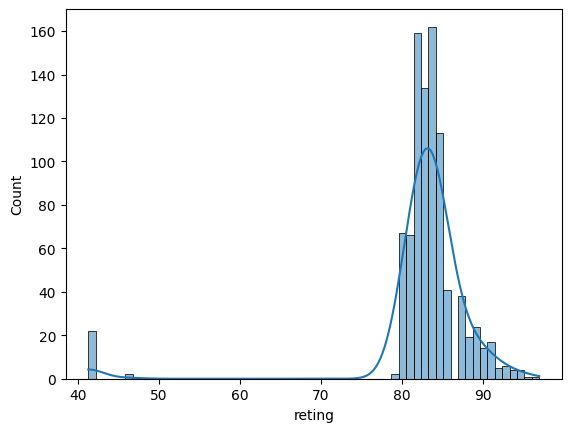

In [153]:
sns.histplot(df['reting'],kde=True)

-> Not a lot of changes seen in reting distribution after removing 10 rows

#### #**is_5g column**

In [154]:
df['is_5g'].value_counts()

is_5g
1    812
0     89
Name: count, dtype: int64

Text(0.5, 1.0, '5G Distribution')

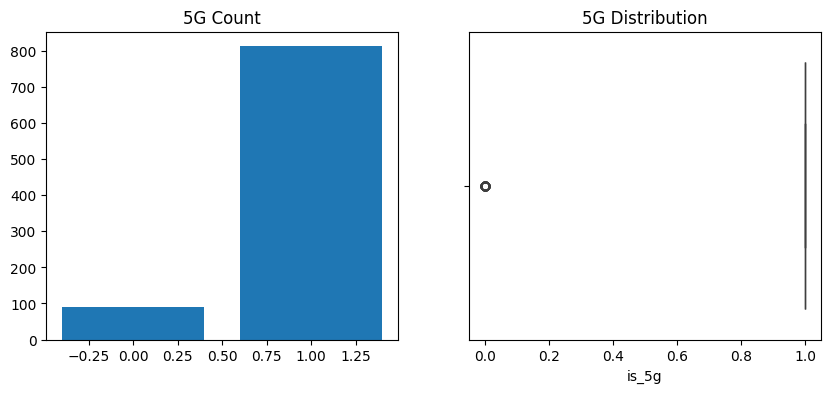

In [157]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].bar(
    df['is_5g'].value_counts().index,
    df['is_5g'].value_counts().values
)
axes[0].set_title("5G Count")

sns.boxplot(x=df['is_5g'], ax=axes[1])
axes[1].set_title("5G Distribution")

#### #**is_nfc**

In [160]:
df['is_nfc'].value_counts()

is_nfc
0.0    497
1.0    404
Name: count, dtype: int64

<Axes: xlabel='is_nfc'>

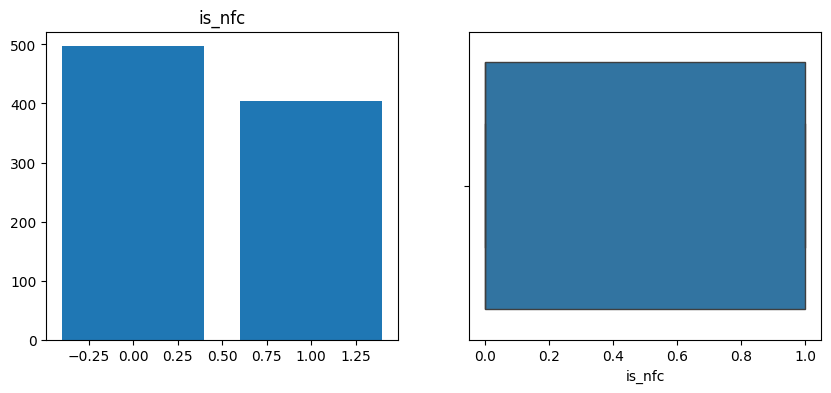

In [163]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].bar(
    df['is_nfc'].value_counts().index,
    df['is_nfc'].value_counts().values
)
axes[0].set_title("is_nfc")
sns.boxplot(x=df['is_nfc'],ax=axes[1])

#### #**processor_brand**

In [164]:
df['processor_brand'].value_counts()

processor_brand
Dimensity     390
Snapdragon    326
Exynos         58
Bionic         40
Helio          35
Unisoc         31
Tensor         19
Tiger           2
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Dimensity'),
  Text(1, 0, 'Snapdragon'),
  Text(2, 0, 'Exynos'),
  Text(3, 0, 'Bionic'),
  Text(4, 0, 'Helio'),
  Text(5, 0, 'Unisoc'),
  Text(6, 0, 'Tensor'),
  Text(7, 0, 'Tiger')])

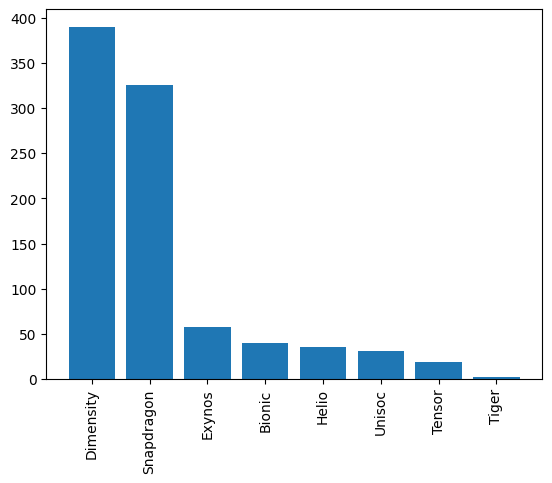

In [167]:
plt.bar(df['processor_brand'].value_counts().index,df['processor_brand'].value_counts().values)
plt.xticks(rotation=90)

#### #**ram**

In [168]:
df['ram'].value_counts()

ram
8.0     426
12.0    183
6.0     130
4.0     122
16.0     32
3.0       7
24.0      1
Name: count, dtype: int64

<BarContainer object of 7 artists>

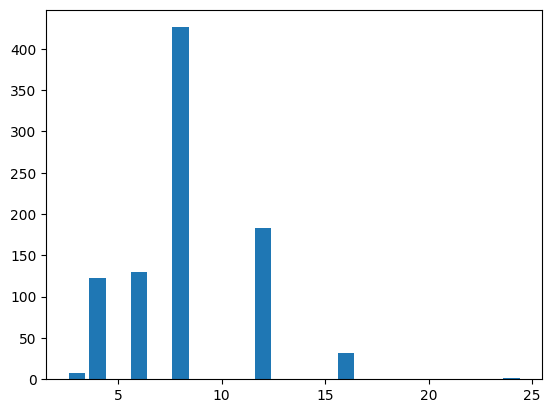

In [169]:
plt.bar(df['ram'].value_counts().index,df['ram'].value_counts().values)

#### #**internal_memory***

In [170]:
df['internal_memory'].value_counts()

internal_memory
128     420
256     323
512      79
64       66
1024     11
2         1
32        1
Name: count, dtype: int64

<BarContainer object of 7 artists>

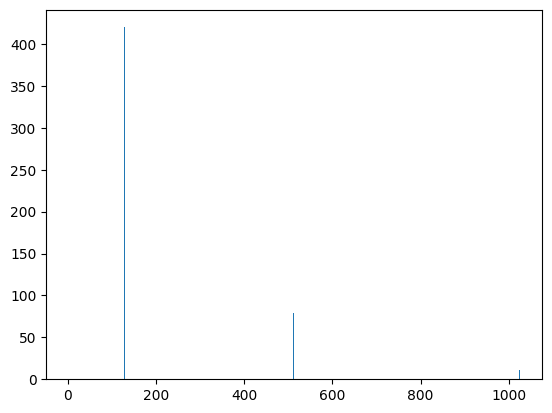

In [175]:
plt.bar(df['internal_memory'].value_counts().index,df['internal_memory'].value_counts().values)


<Axes: xlabel='internal_memory'>

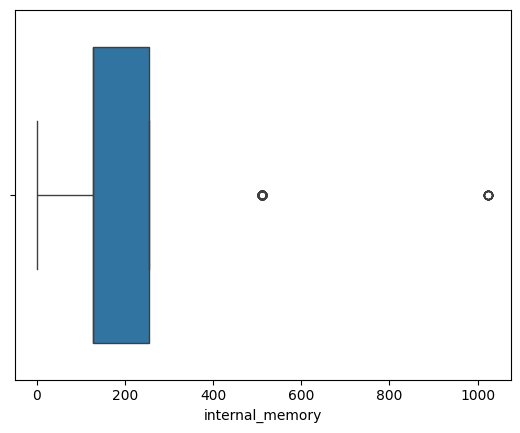

In [176]:
sns.boxplot(x=df['internal_memory'])

In [177]:
df[df['internal_memory']>1000]

,brand,price,reting,is_5g,is_nfc,is_ir_blaster,processor_brand,core,proccessor_speed,ram,internal_memory,battery_size,fast_charge,charging_speed,rear_mp,front_mp,os,display_size,refresh_rate
226,Oneplus,81999,93.00,1,1.0,1,Snapdragon,8,4.32,24.0,1024,6000,1,100,50,32,Android,6.82,120
263,Apple,189900,83.00,1,1.0,0,Bionic,6,2.60,12.0,1024,4832,1,20,48,18,iOS,6.90,120
280,Samsung,216999,97.00,1,1.0,0,Snapdragon,8,4.47,16.0,1024,4400,1,25,200,10,Android,8.00,120
348,Samsung,159499,94.00,1,1.0,0,Snapdragon,8,4.47,12.0,1024,5000,1,45,200,12,Android,6.90,120
361,Samsung,159999,94.00,1,1.0,0,Snapdragon,8,3.30,12.0,1024,5000,1,45,200,12,Android,6.80,120
506,Oneplus,149998,94.00,1,1.0,1,Snapdragon,8,3.20,16.0,1024,4805,1,67,64,32,Android,7.82,120
603,Apple,167900,89.00,1,1.0,0,Bionic,6,4.05,8.0,1024,4685,1,20,48,12,iOS,6.90,120
654,Apple,174900,83.00,1,1.0,0,Bionic,6,2.60,12.0,1024,3988,1,20,48,18,iOS,6.30,120
756,Apple,159900,84.09,1,1.0,0,Bionic,6,2.60,8.0,1024,3149,1,20,48,18,iOS,6.50,60
782,Apple,159900,89.00,1,1.0,0,Bionic,6,4.05,8.0,1024,3582,1,20,48,12,iOS,6.30,120


data is right

In [178]:
#### #**battery_size**

In [179]:
df['battery_size'].value_counts().sort_index(ascending=False)

battery_size
7550     2
7300     6
7100     3
7000    50
6800     3
        ..
3279     2
3274     1
3240     1
3149     3
2716     1
Name: count, Length: 79, dtype: int64

(0.0, 100.0)

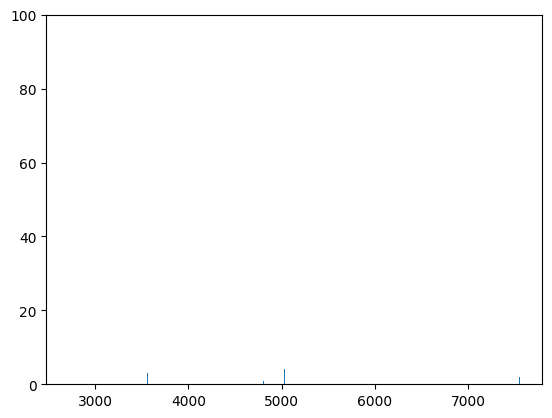

In [180]:
plt.bar(df['battery_size'].value_counts().index,df['battery_size'].value_counts().values)
plt.ylim(0,100)

<Axes: xlabel='battery_size'>

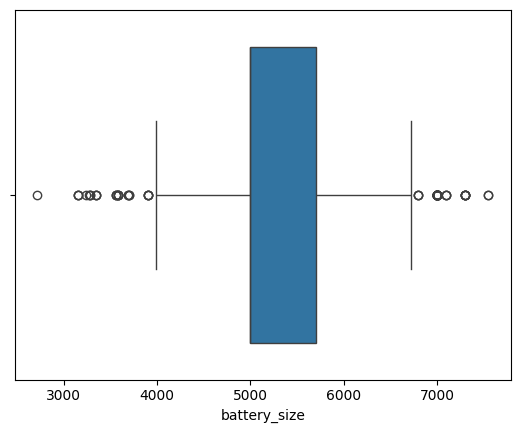

In [181]:
sns.boxplot(x=df['battery_size'])

In [182]:
df[df['battery_size']<3000]

,brand,price,reting,is_5g,is_nfc,is_ir_blaster,processor_brand,core,proccessor_speed,ram,internal_memory,battery_size,fast_charge,charging_speed,rear_mp,front_mp,os,display_size,refresh_rate
754,Apple,69873,83.0,0,1.0,0,Bionic,6,2.39,3.0,64,2716,1,20,12,7,iOS,5.8,60


#### #**fast_charge**

In [183]:
df['fast_charge'].value_counts()

fast_charge
1    897
0      4
Name: count, dtype: int64

In [184]:
df[df['fast_charge']==0]

,brand,price,reting,is_5g,is_nfc,is_ir_blaster,processor_brand,core,proccessor_speed,ram,internal_memory,battery_size,fast_charge,charging_speed,rear_mp,front_mp,os,display_size,refresh_rate
409,Lava,13499,41.3,1,0.0,0,Dimensity,8,2.6,6.0,128,5000,0,20,50,8,Android,6.67,120
739,Motorola,6998,83.0,0,0.0,0,Tiger,8,1.8,4.0,64,5000,0,20,48,8,Android,6.50,90
761,Lava,13499,41.3,0,0.0,0,Dimensity,8,2.4,6.0,128,5000,0,20,64,16,Android,6.67,60
843,Oppo,9892,84.0,0,0.0,0,Helio,8,2.0,4.0,64,5000,0,20,8,5,Android,6.56,60


<Axes: xlabel='fast_charge'>

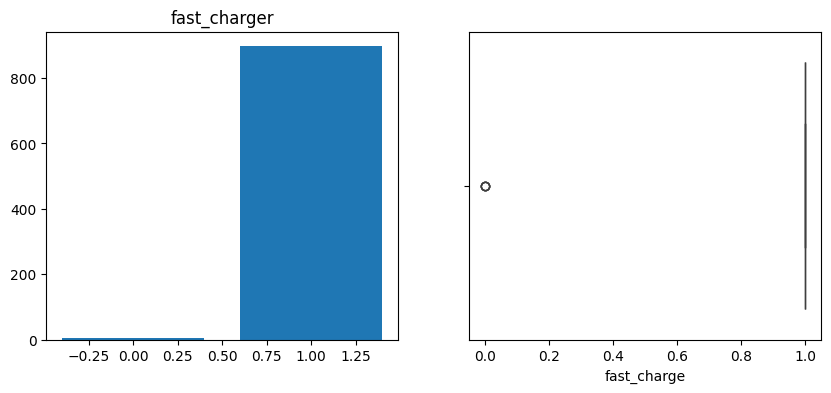

In [195]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].bar(
    df['fast_charge'].value_counts().index,
    df['fast_charge'].value_counts().values
)
axes[0].set_title("fast_charger")
sns.boxplot(x=df['fast_charge'],ax=axes[1])

#### #**charging_speed**

In [194]:
df['charging_speed'].value_counts()

charging_speed
45     138
80     125
25     106
33      84
18      69
20      62
44      49
90      45
15      38
120     34
67      31
100     25
30      17
68      13
65      10
10      10
50       9
66       9
60       7
70       6
35       3
40       2
27       2
37       2
125      2
150      2
23       1
Name: count, dtype: int64

<Axes: xlabel='charging_speed'>

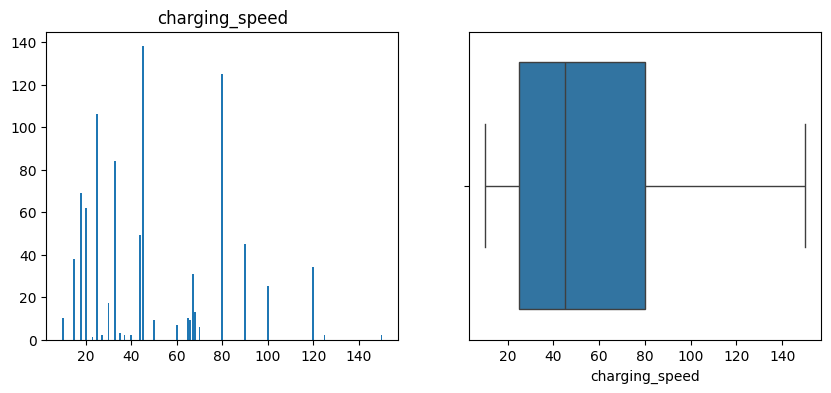

In [196]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].bar(
    df['charging_speed'].value_counts().index,
    df['charging_speed'].value_counts().values
)
axes[0].set_title("charging_speed")
sns.boxplot(x=df['charging_speed'],ax=axes[1])

-> it consists of no outliers

#### #**front_mp**

In [209]:
df['front_mp'].value_counts()

front_mp
16    189
32    178
8     154
50     99
13     83
12     63
5      55
20     27
10     24
18     12
11      7
42      5
40      1
25      1
7       1
0       1
44      1
Name: count, dtype: int64

<Axes: xlabel='front_mp'>

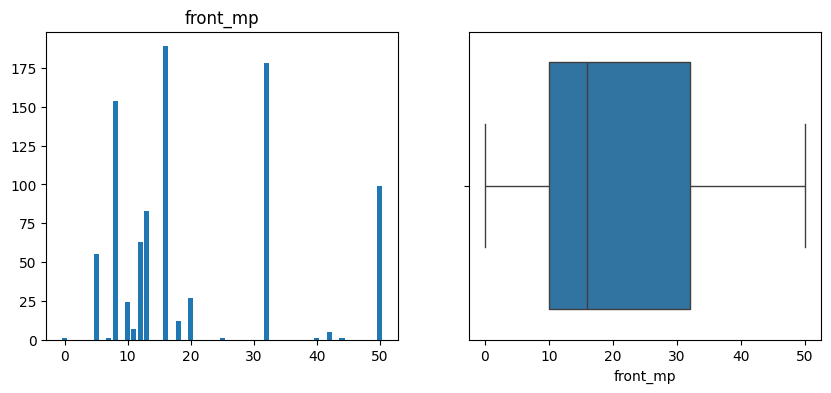

In [210]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].bar(
    df['front_mp'].value_counts().index,
    df['front_mp'].value_counts().values
)
axes[0].set_title("front_mp")

sns.boxplot(x=df['front_mp'], ax=axes[1])

#### #**refresh_rate**

In [207]:
df['refresh_rate'].value_counts()

refresh_rate
120    629
90     136
60      67
144     67
165      2
Name: count, dtype: int64

<Axes: xlabel='refresh_rate'>

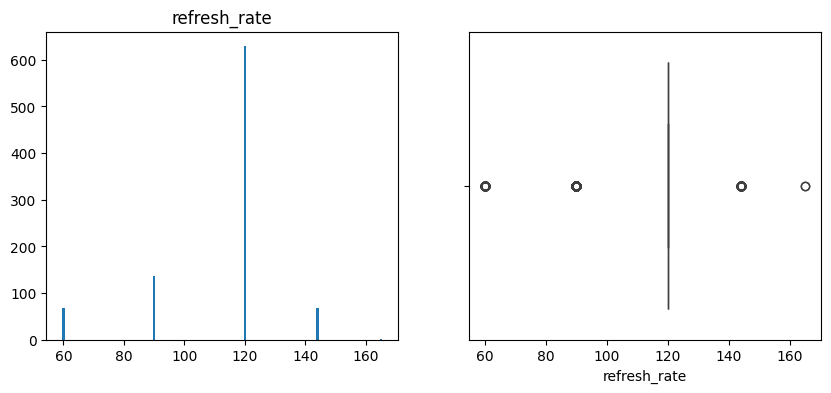

In [208]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].bar(
    df['refresh_rate'].value_counts().index,
    df['refresh_rate'].value_counts().values
)
axes[0].set_title("refresh_rate")

sns.boxplot(x=df['refresh_rate'], ax=axes[1])

#### #**display_size**

In [200]:
df['display_size'].value_counts()

display_size
6.67    164
6.70    145
6.78     98
6.77     52
6.74     42
6.72     32
6.80     31
6.50     27
6.90     25
6.60     24
6.55     20
6.10     19
6.83     19
6.56     18
6.43     18
6.30     17
6.88     14
6.40     13
6.75     12
6.59     11
6.79     10
6.20      8
6.57      8
6.68      7
6.82      7
6.58      7
7.60      6
6.38      5
6.44      4
6.71      4
6.45      4
6.81      3
8.00      3
8.03      3
6.47      3
6.62      3
6.73      2
6.32      2
6.31      2
6.36      1
6.14      1
7.82      1
6.96      1
7.85      1
6.53      1
6.08      1
6.26      1
5.80      1
Name: count, dtype: int64

In [201]:
df['display_size'].describe()

count    901.000000
mean       6.682142
std        0.214022
min        5.800000
25%        6.670000
50%        6.700000
75%        6.770000
max        8.030000
Name: display_size, dtype: float64

<Axes: xlabel='display_size'>

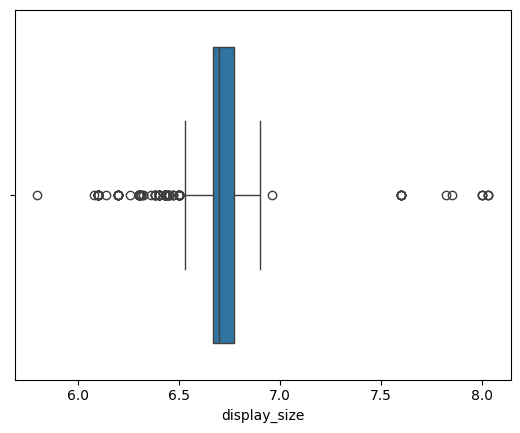

In [202]:
sns.boxplot(x = df['display_size'])

In [203]:
Q1 = df['display_size'].quantile(0.25)
Q3 = df['display_size'].quantile(0.75)
IQR = Q3-Q1
print("Q1 :",Q1)
print("Q2 :",Q3)
print("IQR :",IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower bound :",lower_bound)
print("Upper bound :",upper_bound)

Q1 : 6.67
Q2 : 6.77
IQR : 0.09999999999999964
Lower bound : 6.5200000000000005
Upper bound : 6.919999999999999


In [204]:
df[df['display_size']>7.5]

,brand,price,reting,is_5g,is_nfc,is_ir_blaster,processor_brand,core,proccessor_speed,ram,internal_memory,battery_size,fast_charge,charging_speed,rear_mp,front_mp,os,display_size,refresh_rate
218,Samsung,174999,95.0,1,1.0,0,Snapdragon,8,4.47,12.0,256,4400,1,25,200,10,Android,8.00,120
280,Samsung,216999,97.0,1,1.0,0,Snapdragon,8,4.47,16.0,1024,4400,1,25,200,10,Android,8.00,120
381,Samsung,103399,90.0,1,1.0,0,Snapdragon,8,3.39,12.0,256,4400,1,25,50,10,Android,7.60,120
440,Google,172999,91.0,1,1.0,0,Tensor,8,3.10,16.0,256,4650,1,20,48,10,Android,8.03,120
476,Tecno,89999,95.0,1,1.0,0,Dimensity,8,3.20,12.0,512,5750,1,70,50,32,Android,7.85,120
488,Samsung,174999,95.0,1,1.0,0,Snapdragon,8,4.47,12.0,512,4400,1,25,200,10,Android,8.00,120
506,Oneplus,149998,94.0,1,1.0,1,Snapdragon,8,3.20,16.0,1024,4805,1,67,64,32,Android,7.82,120
517,Vivo,159999,96.0,1,1.0,1,Snapdragon,8,3.30,16.0,512,5700,1,100,64,32,Android,8.03,120
551,Vivo,149998,94.0,1,1.0,1,Snapdragon,8,3.30,16.0,512,6000,1,80,50,20,Android,8.03,120
646,Samsung,94990,89.0,1,1.0,0,Snapdragon,8,3.20,12.0,256,4400,1,25,50,10,Android,7.60,120


In [213]:
df.head()

,brand,price,reting,is_5g,is_nfc,is_ir_blaster,processor_brand,core,proccessor_speed,ram,internal_memory,battery_size,fast_charge,charging_speed,rear_mp,front_mp,os,display_size,refresh_rate
0,Samsung,74999,92.0,1,1.0,0,Snapdragon,8,3.30,12.0,256,5000,1,45,200,12,Android,6.80,120
1,Oneplus,24997,83.0,1,0.0,1,Dimensity,8,3.35,8.0,128,7100,1,80,50,16,Android,6.77,120
2,Apple,47999,81.0,1,1.0,0,Bionic,6,3.46,6.0,128,3349,1,20,48,12,iOS,6.10,60
3,Realme,16999,82.0,1,0.0,0,Dimensity,8,2.40,6.0,128,7000,1,60,50,50,Android,6.81,144
4,Samsung,33890,84.0,1,1.0,0,Exynos,10,3.11,8.0,128,4700,1,25,50,10,Android,6.70,120


This cell saves the current state of the DataFrame df to a new CSV file named 'after_EDA_dataset.csv', without including the DataFrame index.

In [214]:
df.to_csv("after_EDA_dataset_lr.csv",index=False)